##Introduction to regression with Neural Networks in Tensorflow

there are many  definitions for a regression problem but in our case, we're going to simplify it:
Predicting a numerical viriable based on some other combination of variable based on some other combination pf variables, even shorter...predicting a number.

In [1]:
##Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.13.0


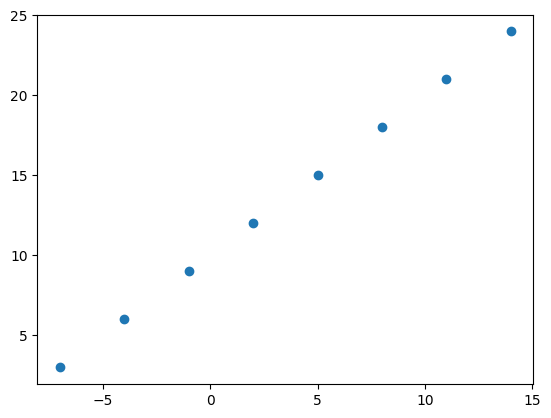

In [2]:
#Creating data to view and fit
import numpy as np
import matplotlib.pyplot as plt

#create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
#create
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#visualize it
plt.scatter(X,Y)

In [3]:
Y==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

#input and output shape

In [4]:
#Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom","garbage"])
house_price = tf.constant([929700])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garbage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([929700], dtype=int32)>)

In [5]:
X[0], Y[0]

(-7.0, 3.0)

In [6]:
X[1], Y[1]

(-4.0, 6.0)

In [7]:
input_shape=X[0].shape
output_shape=Y[0].shape
input_shape, output_shape


((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0], Y[0]

(-7.0, 3.0)

In [10]:
#Turn our Numpy arrays into tensors
X= tf.cast(tf.constant(X), dtype=tf.float32) #converting np to tensors
Y= tf.cast(tf.constant(Y), dtype=tf.float32) #converting np to tensors
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape=X[0].shape
output_shape=Y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

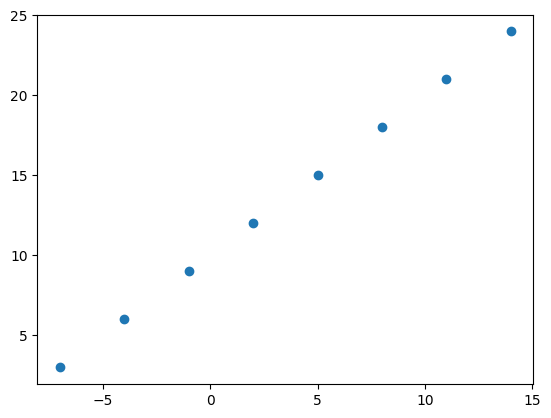

In [12]:
plt.scatter(X,Y)

##Steps in modelling with tensorflow

1.Creating a model - define the input and output layers, as well as the hidden layers of deep learning model.

2, Compilling a model - define the loss function(in other words, the function which tells our model how wrong it is) and the optimizer(tells our model how to improve the patter its learning) and evaluation metrics(what we can use to interpret the performance of our model).

3.Fitting a model - letting the model try to find patterns between X&Y(features and label)

In [13]:
#set random seed
tf.random.set_seed(42)

#1. create a model using the sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)]) #same defining a model
#model.add(tf.keras.layers.Dense(1)) #same

#2.Compile the model
#mae: mean absolute error
#SGD: Stochastic Gradient Desent
model.compile(loss=tf.keras.losses.mae,
              optimizer="sgd", #tf.keras.optimizers.SGD() = "sgd"
              metrics=["mae"])

#3.Fit the model only work in dtype=float32 or 32bit
#epochs=5 or 5 opportunity
#requires tf.expand_dims
model.fit(tf.expand_dims(X, axis=-1),Y, epochs=5)


Epoch 1/5
1/1 [==============================] - 0s 414ms/step - loss: 11.0487 - mae: 11.0487
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9162 - mae: 10.9162
Epoch 3/5
1/1 [==============================] - 0s 15ms/step - loss: 10.7837 - mae: 10.7837
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 10.6512 - mae: 10.6512
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 10.5187 - mae: 10.5187


In [14]:
#check out x and y
X,Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
#try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 110ms/step


array([[14.931077]], dtype=float32)

In [16]:
y_pred + 11

array([[25.931076]], dtype=float32)

Improve our model
We can improve our model, by altering the steps we took to create a model.

1. **Create a model - here we might add more layers
increase the number of hidden units(all call neurons)
within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model - here we might change the optimization function or perhaps the ***learning rate** of optimization function

3. **Fitting a model** here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model examples to learn from).



In [17]:
#let rebuild our model

#1.Create the model
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#3. Fit the model(this time we'll train for longer)
model.fit(tf.expand_dims(X,axis=-1),Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 534ms/step - loss: 21.4571 - mae: 21.4571
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 21.0640 - mae: 21.0640
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 20.6708 - mae: 20.6708
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 20.3283 - mae: 20.3283
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 20.0471 - mae: 20.0471
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 19.7658 - mae: 19.7658
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 19.4846 - mae: 19.4846
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 19.2033 - mae: 19.2033
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 18.9221 - mae: 18.9221
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 18.6408 - mae: 18.6408
Epoch 11/100
1/1 [==============================

In [18]:
X,Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
model.predict([17.0])

1/1 [==============================] - 0s 113ms/step


array([[29.269197]], dtype=float32)

##Smaller to larger model

In [20]:
from keras.src.engine.training import optimizer
#let's see if we can make another to improve our model
#1 create the model (this time with extra hidden layer with 100 hidden units)
# ***relu***
#hyperparameter layers: tf.keras.layers.Dense(50, activation=None)
model = tf.keras.Sequential([
    #tf.keras.layers.Dense(100, activation="relu")
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)])

#2 Compile our model
#lr = learning rate or in code *** learning_rate
#lr is prone to miscalculation
#learning rate most important basis of getting the best prediction
model.compile(loss="mae", #shortcut of tf.keras.losses.mae
                   #optimizer=tf.keras.optimizers.SGD(),
                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                   metrics=["mae"])
#3 fit the model but multiple epochs(possibilities)
model.fit(tf.expand_dims(X,axis=-1),Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 818ms/step - loss: 12.5078 - mae: 12.5078
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 11.7560 - mae: 11.7560
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 10.9894 - mae: 10.9894
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 10.2064 - mae: 10.2064
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 9.4054 - mae: 9.4054
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 8.5839 - mae: 8.5839
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 7.7390 - mae: 7.7390
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 6.8684 - mae: 6.8684
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 6.8358 - mae: 6.8358
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 7.1903 - mae: 7.1903
Epoch 11/100
1/1 [==============================] - 0s 10ms/s

In [21]:
#lets remid ourselves of the data
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [22]:
model.predict([17.0]) #more accurate in reference

1/1 [==============================] - 0s 187ms/step


array([[25.372355]], dtype=float32)

##Evaluting a model

In practice, a typical workflow you'll go through when building neural networks is:

Build a model -> fit it -> evaluate it -> tweak a model->fit it -> evaluate it -> tweak a model->fit it -> evaluate it...

#whebnit comes to evaluation... there are 3 words you should memorize
"Visualize, visualize, visualize"

It's a good idea to visualize:
*the data -  what data are we working with? what does it look like?

*The model itself - what does our model look like?

*The training of a model = how does a model perform while it learns

*The predictions of the model - how do rthe predictions of a model line up against the ground truth(the original labels)?





In [23]:
#Make a bigger dataset
X= tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [24]:
#make labels for the dataset
Y=X+10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

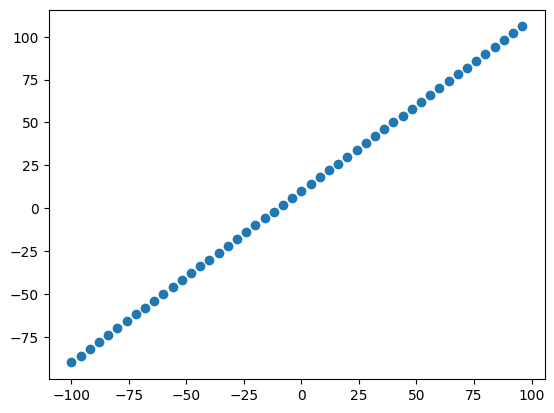

In [25]:
#visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,Y)

###The 3 Sets...

*Training set - the model learns from this data, which is typically 70-80& of the total data you have available.

*Validation set -  the model gets tuned on this data which is typically 10-15% of the data available.(tweaking the data)

*Test set - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [26]:
#check the lenght of how many ssample we have
len(X)

50

In [27]:
#Split the data into train and test sets
X_train = X[:40] # first 40 are training samples(80% of the data)
Y_train = Y[:40]
X_test = X[40:] #last 10 are testing samples(20& of the data)
Y_test = Y[40:]

len(X_train), len(X_test), len(Y_train), len(Y_test)

(40, 10, 40, 10)

###Visualzing the data
Now we've got our data training and test sets...Let's visualize it again!


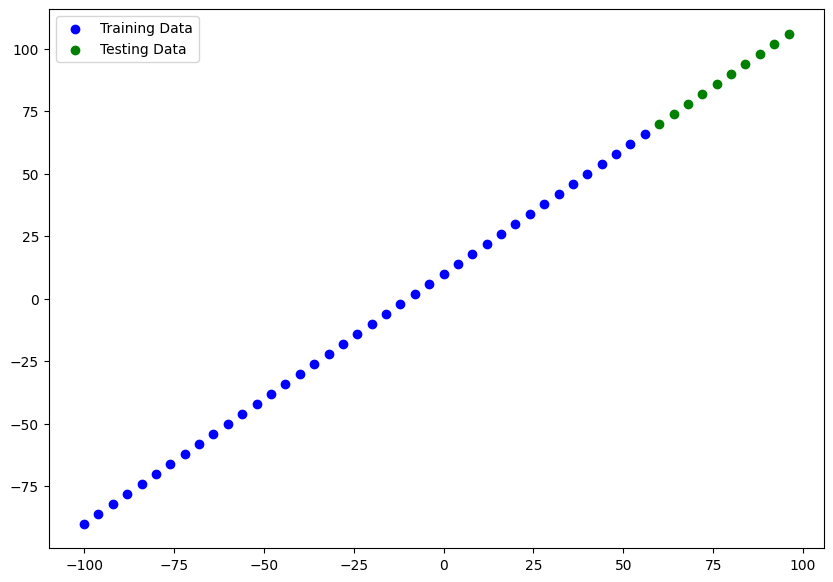

In [28]:
plt.figure(figsize=(10,7))
#plot training data in blue
plt.scatter(X_train, Y_train, c="b", label="Training Data")
#plot training data in green
plt.scatter(X_test, Y_test, c="g", label="Testing Data")
#Show a legend
plt.legend();




In [29]:
#let's have a look at how to build a neural network for our data

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3.fit the model
#model.fit(tf.expand_dims(X_train,axis=-1),Y_train, epochs=100)
#model.summary()

In [30]:
X[0],Y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [31]:
#lets create a model which build automatically by
#defining the *input_shape* argrument in the first layer
tf.random.set_seed(42)

#1.create a model(same above)
#one shape only X[0] one input, Y[0] one output
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])



In [32]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##Total params - total number of parameters in the model
*Trainable parameters -  these are the parameters(patterns) the model can update as it trains.

*Non-trainable params - these parameters aren't updated during training(this is typical when you bring in already learn patterns from other models during transfer learning)

📚Resources: for a more in-depth overview of trainable parameters within a layer, check out MIT's introduction to deep learning video.

🔧Exercise: Try to playing around with the number of hidden units in the dense layer, see how that effects the number of parameters(total and trainable) by calling model summary().


In [33]:
#lets fit our model in training data
#verbose=0 silent,verbose=1 standard
model.fit(tf.expand_dims(X_train, axis=-1), Y_train,epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 15ms/step - loss: 31.4514 - mae: 31.4514
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 8.8321 - mae: 8.8321
Epoch 3/100
2/2 [==============================] - 0s 14ms/step - loss: 9.6953 - mae: 9.6953
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 11.8371 - mae: 11.8371
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.9041 - mae: 10.9041
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 10.0775 - mae: 10.0775
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 9.1107 - mae: 9.1107
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0941 - mae: 9.0941
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 15.0761 - mae: 15.0761
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 7.5708 - mae: 7.5708
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - 

In [34]:
#1 create a model
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
],name="model_1")

#2 compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3 fit the model
model.fit(tf.expand_dims(X_train,axis=-1), Y_train, epochs=100)



Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 40.4708 - mae: 40.4708
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 28.2113 - mae: 28.2113
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 33.8990 - mae: 33.8990
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 24.7927 - mae: 24.7927
Epoch 5/100
2/2 [==============================] - 0s 19ms/step - loss: 14.6942 - mae: 14.6942
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 11.7037 - mae: 11.7037
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 11.0542 - mae: 11.0542
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 11.0568 - mae: 11.0568
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 39.9962 - mae: 39.9962
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 27.4509 - mae: 27.4509
Epoch 11/100
2/2 [==============================] - 0s

In [35]:
#Get the summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


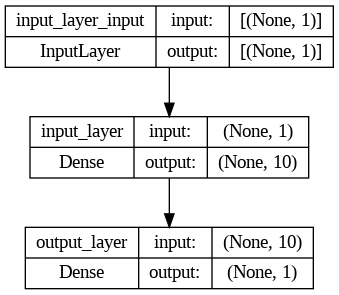

In [36]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

Visualizing our model's predictions

To visualize predictions, its a good idea to plot the against the ground truth labels.

Often you'll see this in the form of 'y_test' or 'y_true' versus 'y_pred'(ground truth versus your model's predictions)

In [37]:
#make some predictions
y_pred =model.predict(X_test)
y_pred

1/1 [==============================] - 0s 174ms/step


array([[ 90.91696 ],
       [ 96.854996],
       [102.79304 ],
       [108.73108 ],
       [114.669106],
       [120.60715 ],
       [126.54518 ],
       [132.48322 ],
       [138.42125 ],
       [144.3593  ]], dtype=float32)

In [38]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑**Note if you feel like you''re going to reuse some kind of functionality in the future, Its a good idea to turn into a function.

In [39]:
#Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=y_pred):
  """
  Plot training data, test data and compares predictions to ground truth labels."""
  plt.figure(figsize=(10, 7))
  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training_data")
  #Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Training_data")
  #Plot model predictions in red
  plt.scatter(test_data, predictions, c="r", label="predictions")
  plt.legend();

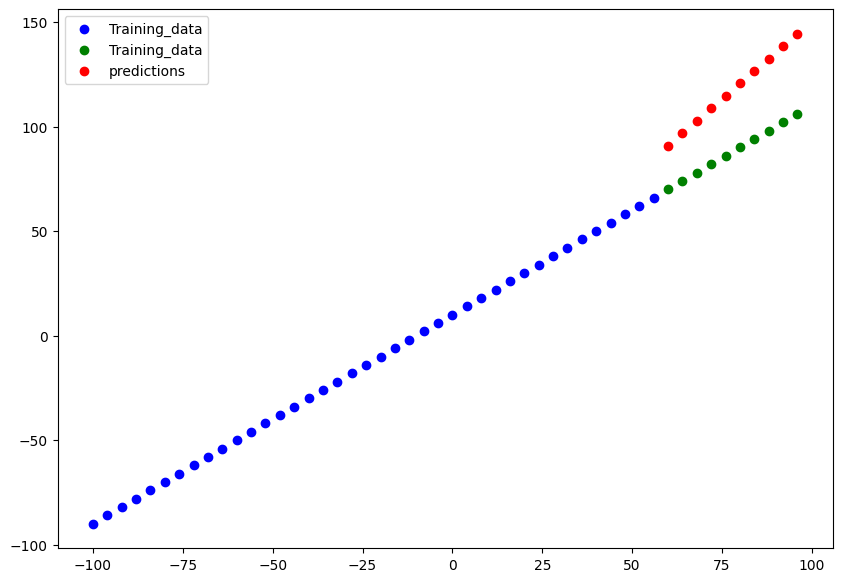

In [40]:
plot_predictions(
    train_data=X_train,
    train_labels=Y_train,
    test_data=X_test,
    test_labels=Y_test,
    predictions=y_pred)

Evaluation our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluations metrics to evaluate your model's performance.

Since we're working on a regresssion, two of the main metrics:

* MAE - mean absolute error, on average how wrong is each of my model's predict
  Use MAE for less errors less than 100

* MSE - mean square error, square the average errors
  Use MSE for Large errors more than 100

*Huber  - cobination of MSE and MAE

In [41]:
#evaluate the model on the test
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 155ms/step - loss: 29.6381 - mae: 29.6381


[29.63812255859375, 29.63812255859375]

In [42]:
#calculate the absolute error
mae=tf.metrics.mean_absolute_error(y_true= Y_test,
                                  y_pred=tf.constant(y_pred))
mae


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([10.183393 , 11.9419985, 15.43443  , 20.73108  , 26.669104 ,
       32.607147 , 38.54518  , 44.483215 , 50.42125  , 56.359303 ],
      dtype=float32)>

In [43]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 90.91696 ],
       [ 96.854996],
       [102.79304 ],
       [108.73108 ],
       [114.669106],
       [120.60715 ],
       [126.54518 ],
       [132.48322 ],
       [138.42125 ],
       [144.3593  ]], dtype=float32)>

In [44]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [45]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 90.91696 ,  96.854996, 102.79304 , 108.73108 , 114.669106,
       120.60715 , 126.54518 , 132.48322 , 138.42125 , 144.3593  ],
      dtype=float32)>

In [46]:
#calculate the mean absolute error
mae=tf.metrics.mean_absolute_error(y_true=Y_test,
                                   y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=29.638128>

In [47]:
#calculate the mean square error
mse=tf.metrics.mean_squared_error(y_true=Y_test,
                                   y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=909.40546>

#===============================================================================================================================================================
###Running experiments to improve our model

build a model -> fit it -> evaluate it -> tweak it-> fit it -> evaluate it -> tweak it-> evaluate it -> tweak it-> fit it-> evaluate it ....

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).

2. Make your model larger(using a more complex model) - this might come in the form of mre layers or more  hidden units in each layers

3. train for longer - give your model more of a chance to find patterns in the data.


Lets do 3 modelling experiments
1. model1 - same as the original model, 1 layer, trained for 100 epochs

2. model2 -2 layers trained for 100 epochs

3. model3 -2 layers trained for 500 epochs


###build model1


In [48]:
#review this function due to error
#make some functions to reuse MAE and MSE
#functions for numpy predictions
def mae(y_true, y_pred):
 return tf.metrics.mean_absolute_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return  tf.metrics.mean_squared_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

In [49]:
#test samples
import tensorflow as tf
import matplotlib.pyplot as plt
x= tf.range(-100,100,4)
y=x+10
xtrain = x[:40] # first 40 are training samples(80% of the data)
ytrain = y[:40]
xtest = x[40:] #last 10 are testing samples(20& of the data)
ytest = y[40:]

In [50]:
#set random seed
tf.random.set_seed(42)

#1. Create the model
model1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

#2. Compile the model
model1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])
#3.fit the model
model1.fit(tf.expand_dims(xtrain,axis=-1),ytrain,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 14ms/step - loss: 103.9445 - mae: 103.9445
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 68.4890 - mae: 68.4890
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 31.0661 - mae: 31.0661
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.7796 - mae: 9.7796
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.7155 - mae: 10.7155
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.9169 - mae: 9.9169
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.9814 - mae: 8.9814
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.1080 - mae: 9.1080
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 19.7234 - mae: 19.7234
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.6765 - mae: 10.6765
Epoch 11/100
2/2 [==============================] - 0s 5ms/step 

1/1 [==============================] - 0s 36ms/step


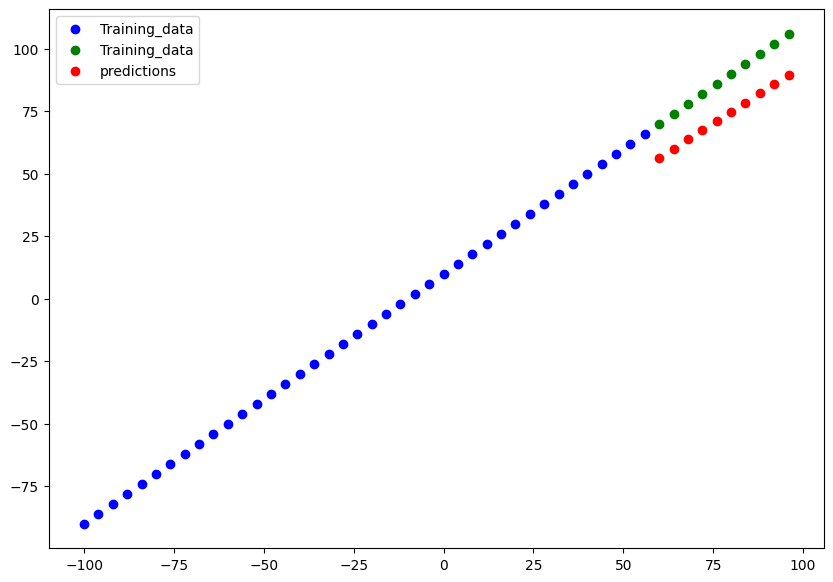

In [51]:
##Make and plot prediction in model1
ypred1=model1.predict(xtest)
plot_predictions(predictions=ypred1)


In [52]:
tf.constant(ypred1), tf.squeeze(ypred1) #observe the shape

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[56.41989 ],
        [60.09751 ],
        [63.77513 ],
        [67.45275 ],
        [71.13036 ],
        [74.80798 ],
        [78.4856  ],
        [82.163216],
        [85.840836],
        [89.518456]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([56.41989 , 60.09751 , 63.77513 , 67.45275 , 71.13036 , 74.80798 ,
        78.4856  , 82.163216, 85.840836, 89.518456], dtype=float32)>)

In [53]:
#calculations model1 evaluation metrics
#dont forget to squeeze due to shape
mae1=mae(ytest,tf.squeeze(ypred1))
#mae1=mae(ytest,ypred1)
mse1=mse(ytest,tf.squeeze(ypred1))
#mse1=mse(ytest,ypred1)
mae1,mse1

(<tf.Tensor: shape=(), dtype=float32, numpy=15.030826>,
 <tf.Tensor: shape=(), dtype=float32, numpy=226.78316>)

#=========================================================================================================
##Build model2

    *2 dense layers, trained for 100 epochs